In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Where do data scientists earn the most cash?

In [81]:
#Source: Kaggle 2019 Data Science Survey
dssurvey=pd.read_csv("/Users/gevorgkhandamiryan/Downloads/multipleChoiceResponses.csv",encoding='latin-1')
dssurvey.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [83]:
### investigating the columns
dssurvey.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [84]:
### getting rid of NA values & selecting the columns we need
ds_filtered=dssurvey[['Country', "CompensationAmount",'CompensationCurrency']].dropna()

In [85]:
### resetting the index, so we have indices starting from 0
ds_filtered = ds_filtered.reset_index().drop(['index'], axis=1)

In [87]:
### working with object types and cleaning the strings
ds_filtered['Country']=ds_filtered['Country'].astype(str)
ds_filtered['CompensationAmount']=(ds_filtered['CompensationAmount'].str.replace(r",",'')).str.replace('-', '0').astype(float)
ds_filtered['CompensationCurrency']=ds_filtered['CompensationCurrency'].astype(str)

In [89]:
### reading the conversion rates data
rates=pd.read_csv("/Users/gevorgkhandamiryan/Downloads/conversionRates.csv",encoding='latin-1')
rates['originCountry']=rates['originCountry'].astype(str)
rates = rates.drop(['Unnamed: 0'], axis=1)
rates.head()

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [91]:
### merging the conversion rates with the compensation data
merged=pd.merge(ds_filtered, rates, left_on='CompensationCurrency',right_on='originCountry',how='inner')

In [93]:
### converting the foreign currency into USD; dividing with 1000 so the numbers do not get too big
merged['convertedUSD']=merged['CompensationAmount']*merged['exchangeRate']/1000

In [96]:
###cleaning the "convertedUSD" column
merged['convertedUSD']=merged['convertedUSD'].astype(int)
merged=merged[(merged['convertedUSD']!=0) & (merged['convertedUSD']!=28297400) & (merged['Country']!='Other')]
merged.head()

,Country,CompensationAmount,CompensationCurrency,originCountry,exchangeRate,convertedUSD
0,United States,250000.0,USD,USD,1.0,250
1,United States,20000.0,USD,USD,1.0,20
2,United States,100000.0,USD,USD,1.0,100
3,United States,133000.0,USD,USD,1.0,133
4,Sweden,80000.0,USD,USD,1.0,80


In [97]:
### getting the countries ordered by median salary
indices = merged.groupby('Country')['convertedUSD'].apply(np.median).sort_values(ascending=False).index
indices

Index(['United States', 'Switzerland', 'Australia', 'Norway', 'Denmark',
       'Netherlands', 'Israel', 'Sweden', 'Germany', 'Canada', 'Ireland',
       'United Kingdom', 'Japan', 'New Zealand', 'Singapore', 'Belgium',
       'France', 'South Korea', 'Finland', 'South Africa', 'Italy', 'Spain',
       'Hong Kong', 'Republic of China', 'Argentina', 'Taiwan',
       'People 's Republic of China', 'Romania', 'Chile', 'Greece', 'Brazil',
       'Portugal', 'Malaysia', 'Czech Republic', 'Belarus', 'Poland', 'Russia',
       'Ukraine', 'Colombia', 'Vietnam', 'Turkey', 'Nigeria', 'Mexico',
       'India', 'Hungary', 'Philippines', 'Iran', 'Kenya', 'Pakistan',
       'Indonesia', 'Egypt'],
      dtype='object', name='Country')

In [104]:
### Mean US DS salary
merged.groupby('Country')['convertedUSD'].apply(np.mean).sort_values(ascending=False)[0]*1000

294650.912106136

In [105]:
### Median US DS salary
merged.groupby('Country')['convertedUSD'].apply(np.median).sort_values(ascending=False)[0]*1000

110000.0

## The Plots

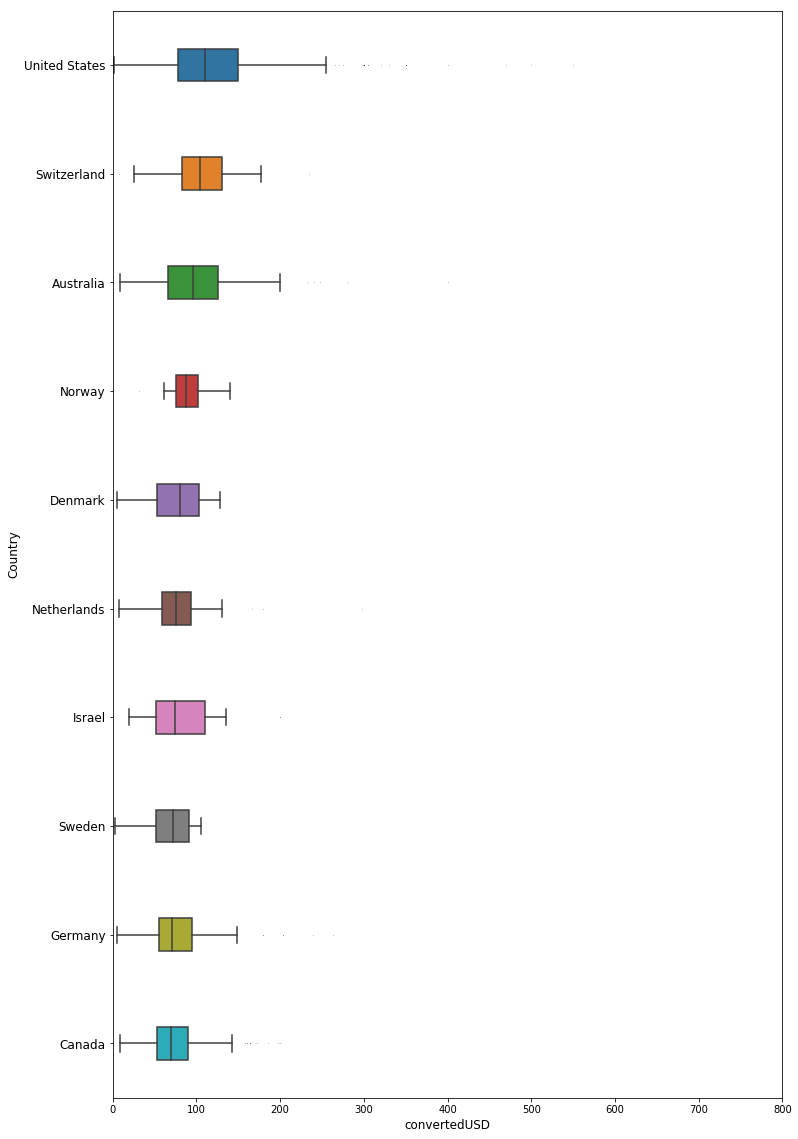

In [99]:
### boxplot
plt.figure(figsize=(12, 20))
plt.xlim(0,800)
sns.boxplot(x='convertedUSD', y="Country", data=merged[merged['Country'].isin(indices[0:10])], orient="h",order=indices[0:10],width=0.3,fliersize=0.1)

Text(0, 0.5, 'Country')

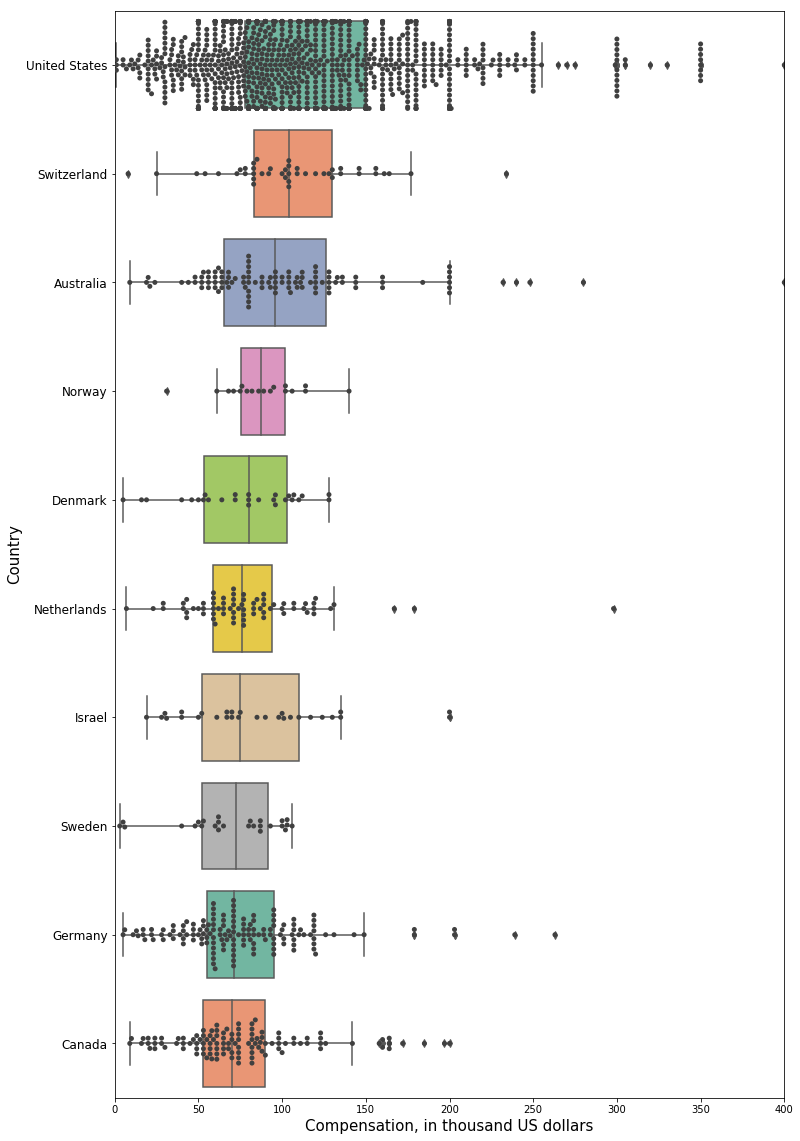

In [100]:
plt.figure(figsize=(12, 20))
plt.xlim(0,400)
# plt.rcParams.update({'font.size': 12})

ax= sns.boxplot(x='convertedUSD', y="Country", data=merged[merged['Country'].isin(indices[0:10])],order=indices[0:10],palette="Set2")
ax= sns.swarmplot(x='convertedUSD', y="Country", data=merged[merged['Country'].isin(indices[0:10])],order=indices[0:10],color='0.25')
plt.xlabel('Compensation, in thousand US dollars')
plt.xlabel('Compensation, in thousand US dollars', fontsize=15)
plt.ylabel('Country')
plt.ylabel('Country', fontsize=15)
